# Introduction to Computer Vision (ECSE 415)
# Assignment 2: Image Stitching and Classification
### Question 2: Image Classification
### Author: Antonios Valkanas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### 3.1.1 Training: Resize the images to 128x128

In [2]:
# Load ford train images
ford_train_1 = cv2.imread('./dataset/ford_train1.JPEG', 0)
ford_train_2 = cv2.imread('./dataset/ford_train2.JPEG', 0)
ford_train_3 = cv2.imread('./dataset/ford_train3.JPEG', 0)
ford_train_4 = cv2.imread('./dataset/ford_train4.PNG', 0)
ford_train_5 = cv2.imread('./dataset/ford_train5.JPEG', 0)

# Load volks train images
volks_train_1 = cv2.imread('./dataset/volks_train1.PNG', 0)
volks_train_2 = cv2.imread('./dataset/volks_train2.JPEG', 0)
volks_train_3 = cv2.imread('./dataset/volks_train3.JPEG', 0)
volks_train_4 = cv2.imread('./dataset/volks_train4.JPEG', 0)
volks_train_5 = cv2.imread('./dataset/volks_train5.JPEG', 0)

# Resize training images

ford_train_1 = cv2.resize(ford_train_1, dsize=(128,128))
ford_train_2 = cv2.resize(ford_train_2, dsize=(128,128))
ford_train_3 = cv2.resize(ford_train_3, dsize=(128,128))
ford_train_4 = cv2.resize(ford_train_4, dsize=(128,128))
ford_train_5 = cv2.resize(ford_train_5, dsize=(128,128))

volks_train_1 = cv2.resize(volks_train_1, dsize=(128,128))
volks_train_2 = cv2.resize(volks_train_2, dsize=(128,128))
volks_train_3 = cv2.resize(volks_train_3, dsize=(128,128))
volks_train_4 = cv2.resize(volks_train_4, dsize=(128,128))
volks_train_5 = cv2.resize(volks_train_5, dsize=(128,128))

train_list = [ford_train_1, ford_train_2, ford_train_3, ford_train_4, ford_train_5, 
                volks_train_1, volks_train_2, volks_train_3, volks_train_4, volks_train_5]

### 3.1.2 Compute HoG features of size (32,32,8). Apply blocknorm in 4 x 4 cell neighborhood. (Deduce values of other required variables.)

In [3]:
def hog(img_list, cell_size, block_size, nbins, h, w):
    img_features = []
    hog = cv2.HOGDescriptor(_winSize=(w // cell_size[1] * cell_size[1],
                                      h // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    n_cells = (h // cell_size[0], w // cell_size[1])

    # Compute HoG features
    for img in img_list:
        hog_feats = hog.compute(img)\
                       .reshape(n_cells[1] - block_size[1] + 1,
                                n_cells[0] - block_size[0] + 1,
                                block_size[0], block_size[1], nbins) \
                       .transpose((1, 0, 2, 3, 4)) 


        # computation for BlockNorm
        gradients = np.full((n_cells[0], n_cells[1], nbins), 0, dtype=float)
        cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

        for off_y in range(block_size[0]):
            for off_x in range(block_size[1]):
                gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                          off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                    hog_feats[:, :, off_y, off_x, :]
                cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                           off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

        # Average gradients
        gradients /= cell_count
    
        img_features.append(gradients)
        
    return img_features

c_size = (4,4)
b_size = (4,4)
nbins = 8
height = 128
width = 128
hog_features = hog(train_list, c_size, b_size, nbins, height, width)

### 3.1.3 Fit a nearest neighbor classiffer with three neighbors. Use KNeighboursClassifier from sklearn library.

In [4]:
clf = KNeighborsClassifier()
train_features = np.array(hog_features)
train_labels = ['ford', 'ford', 'ford', 'ford', 'ford', 'volks', 'volks', 'volks', 'volks', 'volks']
train_labels = np.array(train_labels)
clf.fit(train_features.reshape(train_features.shape[0],-1), train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 3.1.1 Testing: Resize test images to 128 x 128.

In [5]:
# Load test images
ford_test = cv2.imread('./dataset/ford_test.JPEG', 0)
volks_test = cv2.imread('./dataset/volks_test.JPEG', 0)
ford_test = cv2.resize(ford_test, dsize=(128,128))
volks_test = cv2.resize(volks_test, dsize=(128,128))
test_imgs = [ford_test, volks_test]

### 3.1.2 Compute HoG features similar to what was done during training.

In [6]:
# Use the same input oarameters as above for nbins, c_size, h and w.
features_test = hog(test_imgs, c_size, b_size, nbins, height, width)
features_test = np.array(features_test)

### 3.1.3 Display the features for both test images.

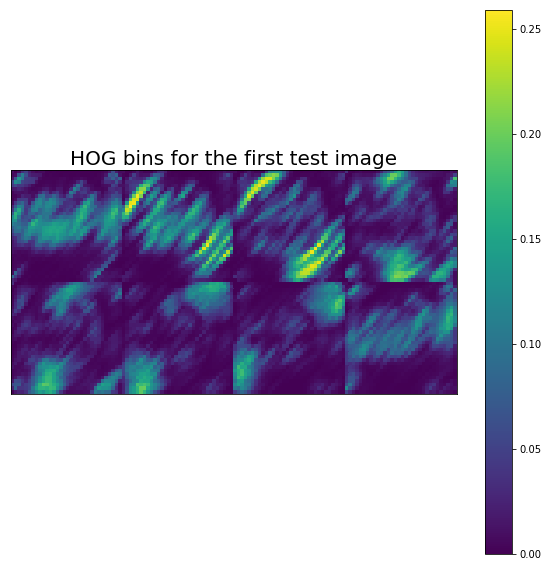

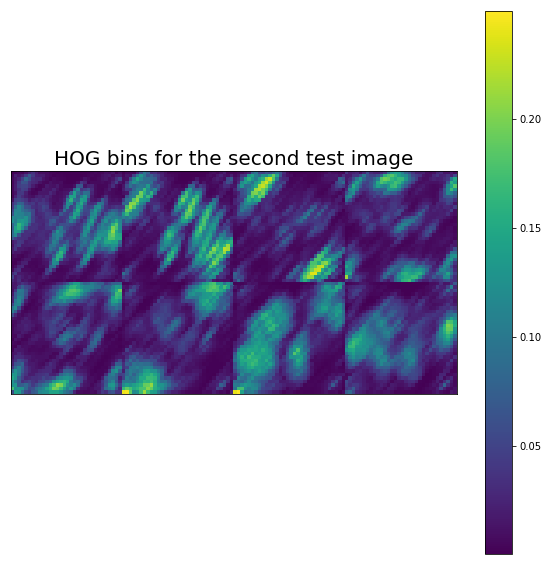

In [7]:
show_bin = 0

def visualization(img):
    row_1 = img[:, :, 0]
    row_2 = img[:, :, 4]
    for i in range(1,4):
        row_1 = np.concatenate((row_1, img[:, :, i]), axis=1)
        row_2 = np.concatenate((row_2, img[:, :, i+4]), axis=1)
    vis = np.concatenate((row_1, row_2), axis=0)
    return vis

plt.figure(figsize = (10,10))
first_img = features_test[0]
plt.pcolor(visualization(first_img))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bins for the first test image", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

plt.figure(figsize = (10,10))
second_img = features_test[1]
plt.pcolor(visualization(second_img))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bins for the second test image", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

### 3.1.4 Classify the test images using the classiffer built above.

Text(0.5,1,'Second test image model prediction: volks')

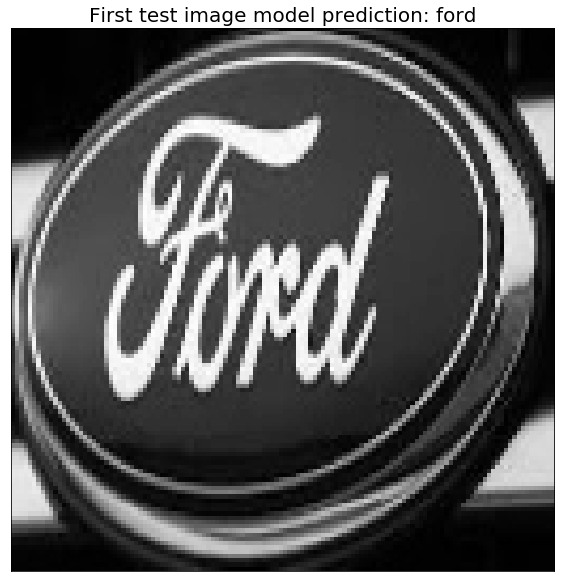

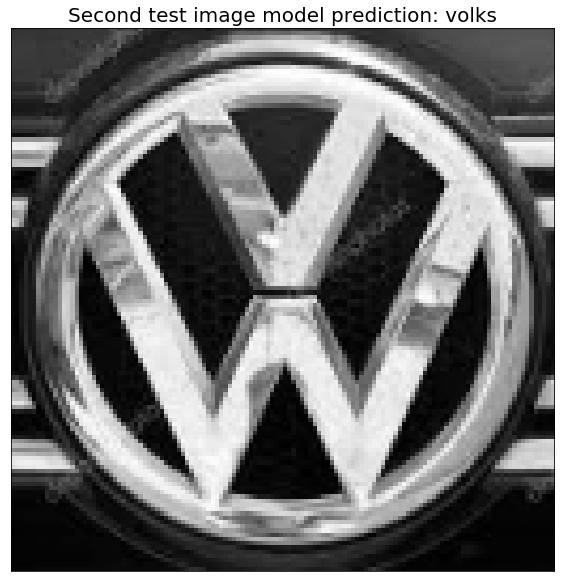

In [8]:
predictions = clf.predict(features_test.reshape(features_test.shape[0],-1))
pred_list = np.ndarray.tolist(predictions)
plt.figure(figsize = (10,10))
plt.imshow(test_imgs[0], cmap = "gray"), plt.xticks([]), plt.yticks([])
plt.title("First test image model prediction: {}".format(pred_list[0]), fontsize = 20)
plt.figure(figsize = (10,10))
plt.imshow(test_imgs[1], cmap = "gray"), plt.xticks([]), plt.yticks([])
plt.title("Second test image model prediction: {}".format(pred_list[1]), fontsize = 20)

### 3.2 Reasoning Questions
#### 3.2.1 Will HoG work if images of logos undergo random rotation? If yes, which property of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform orientation of the logos.
HoG is not geometrically invariant and will not tolerate rotation. The reason for this is that rotating the image would also change the orientation of the gradients as they appear on the image which would cause the algorithm to change its output. To regain uniform orientation of the logos, you could use a geometrically invariant method for feature detection based on homography. Two methods that can do this are SIFT and SURF.

#### 3.2.2 Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn. How many and which directions of the gradient are sufficient in order to correctly classify the images into three categories?
Given that there are two diagonals and three classes, we could use the gradient dierections around the diagonal locations to classify the square. Using HoG we could easily recognize if all the gradients are normal to one diagonal (case 2 and 3 in Figure 3) or if there is a mix of both (case 3 in Figure 1). The information of the gradient along the two diagonal directions would therefore suffice for classification.